# **Team Project**
## Consumer Behavior and Shopping Habits

### Group#24 
#### Team Members 
- Shiraz Latif
- Jessilynn Kim
- Mykhailo Vitvinov
- Olena Bolokhonova







### Description:
This project aims to analyze consumer behavior and shopping habits using a dataset that includes various demographic, transactional, and behavioral attributes of customers. The dataset encompasses a wide range of variables such as age, gender, purchase amount, location, product category, and more. The primary objective is to explore the relationships between these variables to uncover meaningful insights that can inform business strategies.
### Purpose:
The purpose of this project is to leverage statistical analysis and machine learning techniques to understand the factors influencing customer purchase behavior. By examining how different variables, such as age and discount application, impact purchase amounts, we aim to provide data-driven recommendations for improving marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction.

#### Libraries Import

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Import specific objects
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
import os
from scipy import stats

#Import for kNN 
from ISLP.models import ModelSpec as MS
import warnings 
warnings.filterwarnings('ignore') # mute warning messages
from ISLP import confusion_table
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


#### Data Import 

In [127]:
cust_data = pd.read_csv("../data/processed/shopping_trends.csv")
cust_data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [128]:
# Load the dataset with specific delimiter and encoding (if necessary)
file_path = "../data/processed/shopping_trends.csv"
cust_data = pd.read_csv(file_path, delimiter=',', encoding='utf-8')  # Adjust delimiter and encoding if needed

### Understanding the Data 

In [129]:
cust_data.shape # 3900 rows and 19 columns 
cust_data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

#### Identifying Missing Values 

In [130]:
cust_data.isna().sum() # there is no missing values 

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## Data Analysis Steps

### Initial Analysis Plan:
Objective:
To explore relationships within the dataset to identify key business questions and predict meaningful outcomes. This exploration will help us formulate specific hypotheses and guide our subsequent detailed analyses.

#### Exploratory Data Analysis

Question: Do women spend more on shopping then Men in a single transaction. 

Conclusion: There is no variance in the average purchase per transaction by Gender. Hence we can not conclude that women spend more per transaction. 


In [131]:
# Distribution by Gender 
cust_data.groupby('Gender')['Purchase Amount (USD)'].agg(['sum', 'count', 'mean']).reset_index()



,Gender,sum,count,mean
0,Female,75191,1248,60.249199
1,Male,157890,2652,59.536199


Question: Is there any difference in rating by Gender ? 

Conclusion: There is no difference in rating by Gender. Average rating by Male and Female is almost same. 

In [123]:
# Rating by Gender 
cust_data.groupby('Gender')['Review Rating'].agg(['count', 'mean']).reset_index()


,Gender,count,mean


### Question: Do older customers have higher average purchase amounts compared to younger customers?

Conclusion: 
The hypothesis that the total purchase amount is influenced by the age of customers is not supported by the regression analysis. 

In [143]:
# Create age groups
bins = [18, 30, 45, 60, 100]
labels = ['19-30', '31-45', '46-60', '60+']
cust_data['Age Group'] = pd.cut(cust_data['Age'], bins=bins, labels=labels, right=False)

In [144]:
# Ensure the Age Group column is created correctly
print(cust_data[['Age', 'Age Group']].head())

   Age Age Group
0   55     46-60
1   19     19-30
2   50     46-60
3   21     19-30
4   45     46-60


In [145]:
# Remove rows with missing Age Group or Purchase Amount (USD)
cust_data = cust_data.dropna(subset=['Age Group', 'Purchase Amount (USD)'])

In [146]:
# Ensure 'Purchase Amount (USD)' is numeric
cust_data['Purchase Amount (USD)'] = pd.to_numeric(cust_data['Purchase Amount (USD)'], errors='coerce')

In [147]:
# Calculate the total purchase amount for each age group
total_purchase_amount = cust_data.groupby('Age Group')['Purchase Amount (USD)'].sum().reset_index()
print("Total Purchase Amount by Age Group:")
print(total_purchase_amount)

Total Purchase Amount by Age Group:
  Age Group  Purchase Amount (USD)
0     19-30                  52905
1     31-45                  65216
2     46-60                  68066
3       60+                  46894


/var/folders/mn/hzb_sstd3t9f6xyvy2fry_5m0000gn/T/ipykernel_57655/1972247288.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_purchase_amount = cust_data.groupby('Age Group')['Purchase Amount (USD)'].sum().reset_index()


In [150]:
# Define the dependent variable (Y) and independent variable (X)
X = cust_data[['Age']]
Y = cust_data['Purchase Amount (USD)']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.4236
Date:                   Thu, 20 Jun 2024   Prob (F-statistic):              0.515
Time:                           21:26:45   Log-Likelihood:                -17876.
No. Observations:                   3900   AIC:                         3.576e+04
Df Residuals:                       3898   BIC:                         3.577e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4798 

Conclusion

The F-statistic is 0.4236 with a p-value of 0.515. This high p-value indicates that the model is not statistically significant, meaning that age does not significantly explain the variance in purchase amount.

The p-value for the age coefficient (0.515) is much greater than 0.05, meaning we fail to reject the null hypothesis. Thus, there is no evidence to suggest that age has a significant effect on purchase amount.

Based on the regression results, there is no significant relationship between age and purchase amount. The model explains none of the variability in purchase amounts, and age does not appear to be a meaningful predictor of purchase amounts. Therefore, we can conclude that older customers do not have higher average purchase amounts compared to younger customers based on this dataset.

### Question: Are purchases with applied discounts  higher in overall spending?

Conclusion: The hypothesis that purchases with applied discounts result in higher overall spending is not supported, as the average purchase amounts are similar and not statistically significantly different between transactions with and without discounts.

In [111]:
# Convert 'Discount Applied' to string to apply string methods
cust_data['Discount Applied'] = cust_data['Discount Applied'].astype(str)

In [112]:
# Check for leading/trailing spaces or case sensitivity issues
cust_data['Discount Applied'] = cust_data['Discount Applied'].str.strip().str.lower()
unique_discount_values = cust_data['Discount Applied'].unique()
print("Unique values in 'Discount Applied' after cleaning:", unique_discount_values)

Unique values in 'Discount Applied' after cleaning: ['1' '0']


In [113]:
# Check for the presence of 'no' values in the dataset
count_yes = (cust_data['Discount Applied'] == 'yes').sum()
count_no = (cust_data['Discount Applied'] == 'no').sum()
print(f"Count of 'yes' values: {count_yes}")
print(f"Count of 'no' values: {count_no}")

Count of 'yes' values: 0
Count of 'no' values: 0


In [114]:
# Convert 'Discount Applied' to binary values
cust_data['Discount Applied'] = cust_data['Discount Applied'].map({'yes': 1, 'no': 0})

In [115]:
# Remove rows with missing Discount Applied or Purchase Amount (USD)
cust_data = cust_data.dropna(subset=['Discount Applied', 'Purchase Amount (USD)'])

In [116]:
# Ensure 'Purchase Amount (USD)' is numeric
cust_data['Purchase Amount (USD)'] = pd.to_numeric(cust_data['Purchase Amount (USD)'], errors='coerce')

In [117]:
# Remove rows with non-numeric 'Purchase Amount (USD)'
cust_data = cust_data.dropna(subset=['Purchase Amount (USD)'])

In [118]:
# Separate transactions with and without discounts
with_discount = cust_data[cust_data['Discount Applied'] == 1]['Purchase Amount (USD)']
without_discount = cust_data[cust_data['Discount Applied'] == 0]['Purchase Amount (USD)']


In [119]:
# Calculate the total and average purchase amount for each group
total_with_discount = with_discount.sum()
total_without_discount = without_discount.sum()
average_with_discount = with_discount.mean()
average_without_discount = without_discount.mean()

In [120]:
# Count the number of transactions for each group
count_with_discount = with_discount.count()
count_without_discount = without_discount.count()

In [73]:
print("Total Purchase Amount with Discount:", total_with_discount)
print("Total Purchase Amount without Discount:", total_without_discount)
print("Average Purchase Amount with Discount:", average_with_discount)
print("Average Purchase Amount without Discount:", average_without_discount)
print("Number of Transactions with Discount:", count_with_discount)
print("Number of Transactions without Discount:", count_without_discount)

Total Purchase Amount with Discount: 99411
Total Purchase Amount without Discount: 133670
Average Purchase Amount with Discount: 59.27906976744186
Average Purchase Amount without Discount: 60.130454340980656
Number of Transactions with Discount: 1677
Number of Transactions without Discount: 2223


In [83]:
# Define the dependent variable (Y) and independent variable (X)
X = cust_data[['Discount Applied']]
Y = cust_data['Purchase Amount (USD)']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.235
Date:                   Thu, 20 Jun 2024   Prob (F-statistic):              0.266
Time:                           13:31:16   Log-Likelihood:                -17876.
No. Observations:                   3900   AIC:                         3.576e+04
Df Residuals:                       3898   BIC:                         3.577e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

Total Purchase Amount:
The total purchase amount for transactions with discounts ($99,411) is lower than for transactions without discounts ($133,670). This is expected because the number of transactions without discounts (2,223) is higher than those with discounts (1,677).

Average Purchase Amount:
The average purchase amount for transactions with discounts ($59.28) is slightly lower than for transactions without discounts ($60.13). The difference is minor, indicating that on average, customers spend nearly the same amount regardless of whether a discount is applied.

Regression Results:
- t-statistic: -1.111
- p-value: 0.266

The p-value of 0.266 is greater than the common significance level of 0.05, indicating that the difference in average purchase amounts between transactions with and without discounts is not statistically significant.
The high p-value suggests that any observed difference in average purchase amounts is likely due to random chance rather than a true effect of discounts.

### Question: Do customers with a higher number of previous purchases have higher average purchase amounts?

- Dataset Glossary:
Column `Previous Purchases` Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

Result: The hypothesis that customers with a higher number of previous purchases have higher average purchase amounts is not supported by the regression analysis. 

In [76]:
# Remove rows with missing Previous Purchases or Purchase Amount (USD)
cust_data = cust_data.dropna(subset=['Previous Purchases', 'Purchase Amount (USD)'])

In [77]:
# Ensure 'Previous Purchases' and 'Purchase Amount (USD)' are numeric
cust_data['Previous Purchases'] = pd.to_numeric(cust_data['Previous Purchases'], errors='coerce')
cust_data['Purchase Amount (USD)'] = pd.to_numeric(cust_data['Purchase Amount (USD)'], errors='coerce')

In [78]:
# Remove rows with non-numeric values
cust_data = cust_data.dropna(subset=['Previous Purchases', 'Purchase Amount (USD)'])

In [79]:
# Group customers by Previous Purchases into segments
# Example segmentation: 0-5, 6-10, 11-20, 21+
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '6-10', '11-20', '21+']
cust_data['Purchase Segment'] = pd.cut(cust_data['Previous Purchases'], bins=bins, labels=labels, right=False)

In [80]:
# Calculate the average purchase amount for each segment
segment_means = cust_data.groupby('Purchase Segment')['Purchase Amount (USD)'].agg(['count', 'mean']).reset_index()
print("Average Purchase Amount by Purchase Segment:")
print(segment_means)

Average Purchase Amount by Purchase Segment:
  Purchase Segment  count       mean
0              0-5    337  59.649852
1             6-10    371  62.102426
2            11-20    770  58.661039
3              21+   2422  59.772915


/var/folders/mn/hzb_sstd3t9f6xyvy2fry_5m0000gn/T/ipykernel_57655/2165194988.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_means = cust_data.groupby('Purchase Segment')['Purchase Amount (USD)'].agg(['count', 'mean']).reset_index()


In [82]:
# Define the dependent variable (Y) and independent variable (X)
X = cust_data[['Previous Purchases']]
Y = cust_data['Purchase Amount (USD)']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.2535
Date:                   Thu, 20 Jun 2024   Prob (F-statistic):              0.615
Time:                           13:22:05   Log-Likelihood:                -17876.
No. Observations:                   3900   AIC:                         3.576e+04
Df Residuals:                       3898   BIC:                         3.577e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

Regression Coefficient:

Coefficient for Previous Purchases: 0.0132

Standard Error: 0.026

t-statistic: 0.503

p-value: 0.615

 The p-value for Previous Purchases is much higher than the significance level, and the R-squared value indicates that the model does not explain the variation in purchase amounts effectively. Therefore, we fail to reject the null hypothesis, suggesting no significant relationship between the number of previous purchases and the purchase amount.

## Classification Model
Lets explore if we can predict if a customer will be a subscriber, based on the provided features. 


####Results: 
The model perform pretty well and the accuracy shows that 83% of predictions were correct. This accuracy shows that the model is very much robust and can be useful in predicting whether a customer can be a potential subscriber, based on their shopping habits. 

In [65]:
cust_data.dtypes

Customer ID                    int64
Age                            int64
Gender                        object
Item Purchased                object
Category                      object
Purchase Amount (USD)          int64
Location                      object
Size                          object
Color                         object
Season                        object
Review Rating                float64
Subscription Status           object
Payment Method                object
Shipping Type                 object
Discount Applied              object
Promo Code Used               object
Previous Purchases             int64
Preferred Payment Method      object
Frequency of Purchases        object
Age Group                   category
Purchase Segment            category
dtype: object

In [69]:
#Encoding categorical data to binary encoding 
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases', 'Age Group', 'Purchase Segment']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    cust_data[col] = le.fit_transform(cust_data[col])
    label_encoders[col] = le



In [ ]:
# Split data into training and testing sets
X = cust_data.drop(columns=['Subscription Status'])
y = cust_data['Subscription Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Train KNN model
k = 5  
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [72]:
# Make predictions
y_pred = knn_model.predict(X_test_scaled)

In [79]:
 confusion_table(y_test, y_pred)


Truth,0,1
Predicted,,
0,469,89
1,40,182


In [80]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       558
           1       0.67      0.82      0.74       222

    accuracy                           0.83       780
   macro avg       0.80      0.83      0.81       780
weighted avg       0.85      0.83      0.84       780



### Exploring Customer Demographics and Purchasing Behavior

Objective:

Investigate how customer demographics, specifically 'Gender' and 'Location', influence purchasing behavior to derive actionable insights for targeted marketing strategies.

#### Dataset Overview and Exploration

Objective: Understand the structure and content of the dataset.

Key Variables and Attributes Explored:

Gender: Analyze differences in purchasing behavior between males and females.

Location: Investigate regional variations in purchasing patterns.

In [1]:
import pandas as pd

# Load the dataset
file_path = '../data/processed/shopping_trends.csv'
cust_data = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Overview:")
print(cust_data.head())

# Check for missing values
print("\nMissing Values:")
print(cust_data.isna().sum())

# Explore unique values in 'Gender' and 'Location'
print("\nUnique Values:")
print("Gender:", cust_data['Gender'].unique())
print("Location:", cust_data['Location'].unique())

Dataset Overview:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discou

### Customer Behavior Analysis

We aim to analyze customer behavior using regression modeling techniques to predict purchase amounts based on demographic and transactional data. We'll start by exploring key variables such as Gender and Location, formulate hypotheses, preprocess the data, and finally implement and test a regression model.

#### Step 1: Dataset Exploration


Objective: Understand the dataset and identify key variables.

Problem Statement: Explore the relationship between customer demographics specifically 'Gender' and 'Location' and their purchasing behavior.

Dataset Overview:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discou

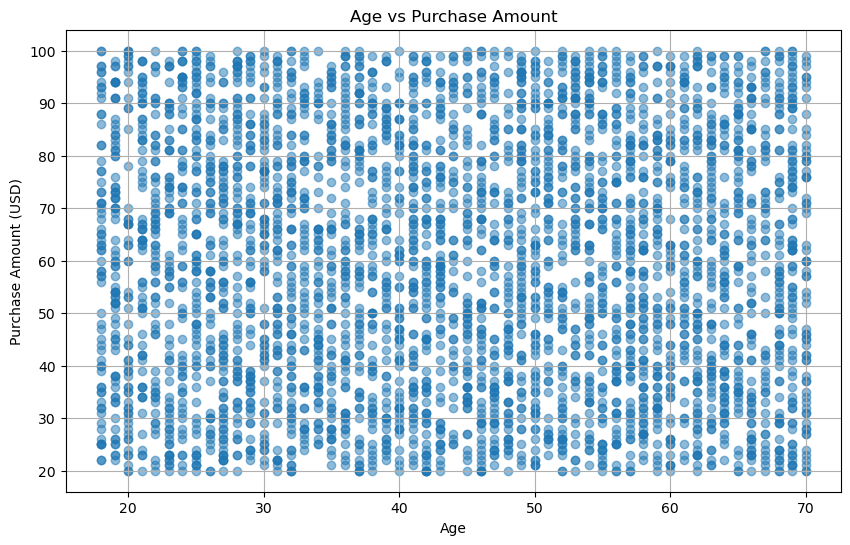

Location Purchase Summary:
          Location   sum  count       mean
0          Alabama  5261     89  59.112360
1           Alaska  4867     72  67.597222
2          Arizona  4326     65  66.553846
3         Arkansas  4828     79  61.113924
4       California  5605     95  59.000000
5         Colorado  4222     75  56.293333
6      Connecticut  4226     78  54.179487
7         Delaware  4758     86  55.325581
8          Florida  3798     68  55.852941
9          Georgia  4645     79  58.797468
10          Hawaii  3752     65  57.723077
11           Idaho  5587     93  60.075269
12        Illinois  5617     92  61.054348
13         Indiana  4655     79  58.924051
14            Iowa  4201     69  60.884058
15          Kansas  3437     63  54.555556
16        Kentucky  4402     79  55.721519
17       Louisiana  4848     84  57.714286
18           Maine  4388     77  56.987013
19        Maryland  4795     86  55.755814
20   Massachusetts  4384     72  60.888889
21        Michigan  4533   

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
cust_data = pd.read_csv("../data/processed/shopping_trends.csv")

# Display dataset overview
print("Dataset Overview:")
print(cust_data.head())
print(cust_data.columns)
print(cust_data.dtypes)
print(cust_data.describe())

# Explore variables: Gender and Location
gender_purchase_summary = cust_data.groupby('Gender')['Purchase Amount (USD)'].agg(['sum', 'count', 'mean']).reset_index()
print("Gender Purchase Summary:")
print(gender_purchase_summary)

# Plot Age vs Purchase Amount
plt.figure(figsize=(10, 6))
plt.scatter(cust_data['Age'], cust_data['Purchase Amount (USD)'], alpha=0.5)
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True)
plt.show()

# Explore location-based insights
location_purchase_summary = cust_data.groupby('Location')['Purchase Amount (USD)'].agg(['sum', 'count', 'mean']).reset_index()
print("Location Purchase Summary:")
print(location_purchase_summary)

#### Hypothesis Formulation

Objective: Formulate hypotheses based on initial exploration.

Hypotheses:

H1: There is a significant difference in purchase amounts between genders.

H2: Age influences purchase amount, with younger customers spending more.

H3: Location affects purchasing behavior, with certain regions showing higher average purchases.

#### Data Preprocessing

Objective: Prepare data for regression modeling.

In [3]:
# Data preprocessing and feature selection
# Assuming further preprocessing steps like encoding categorical variables
# Selecting features and target variable
X = cust_data[['Age', 'Review Rating']]  # Features
y = cust_data['Purchase Amount (USD)']   # Target variable

#### Regression Modeling

Objective: Design, implement, and test a regression model.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 562.2494662957721
R-squared: -0.004766223232418154


#### Conclusion

This project highlighted the utility of regression modeling in understanding and predicting customer purchase behavior. By leveraging demographic insights and transactional data, businesses can effectively strategize marketing efforts, optimize product offerings, and ultimately enhance customer satisfaction and loyalty. Continued analysis and refinement of predictive models will be crucial in adapting to evolving consumer preferences and market dynamics.

Through this structured approach, we've laid a foundation for ongoing data-driven decision-making aimed at maximizing business growth and customer engagement in the competitive retail landscape.